In [188]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score,precision_recall_curve,ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import (OneHotEncoder, PowerTransformer, StandardScaler)
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [189]:
pip install --upgrade numpy pandas matplotlib seaborn scikitplot scikit-learn catboost lime shap

  Using cached numpy-2.0.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.3 MB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached matplotlib-3.9.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.3 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [190]:
# Read the data set

df = pd.read_csv("predictive_maintenance.csv")

In [191]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [192]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [193]:
# Product ID , UDI , Target are not needed
# So, drop them

df.drop(["Product ID", "UDI" , "Target"] , axis = 1 , inplace = True)

In [194]:
df

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min] Failure Type  
0                       1551         42.8                0   No Failure  
1                       1408         46.3                3   No Failure  
2                       1498         49.4                5   No Failure  
3                       1433         39.5                7   No Failure  
4                       1408         40.0                9   No Failure  
...                      ...          ...              ...          ...  
9995                    1604         29.5               14   No Failure  
9996                    1632         31.8               17   No Failure  
9997                    1645         33.4               22   No Failure  
9998                    1408         48.5               25   No Failure  
9999                    1500         40.2               30   No Failure  

[10000 rows x 7 columns]

In [195]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

In [196]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [197]:
df["Failure Type"].replace({"No Failure" : 0 ,
                            "Heat Dissipation Failure" : 1 ,
                            "Power Failure" : 2 ,
                            "Overstrain Failure" : 3 ,
                            "Tool Wear Failure" : 4 ,
                            "Random Failures" : 5} ,
                           inplace = True)

In [198]:
df["Type"].replace({"H" : 0 ,"L" : 1 , "M" : 2} , inplace = True)

In [199]:
df

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Failure Type  
0                       1551         42.8                0             0  
1                       1408         46.3                3             0  
2                       1498         49.4                5             0  
3                       1433         39.5                7             0  
4                       1408         40.0                9             0  
...                      ...          ...              ...           ...  
9995                    1604         29.5               14             0  
9996                    1632         31.8               17             0  
9997                    1645         33.4               22             0  
9998                    1408         48.5               25             0  
9999                    1500         40.2               30             0  

[10000 rows x 7 columns]

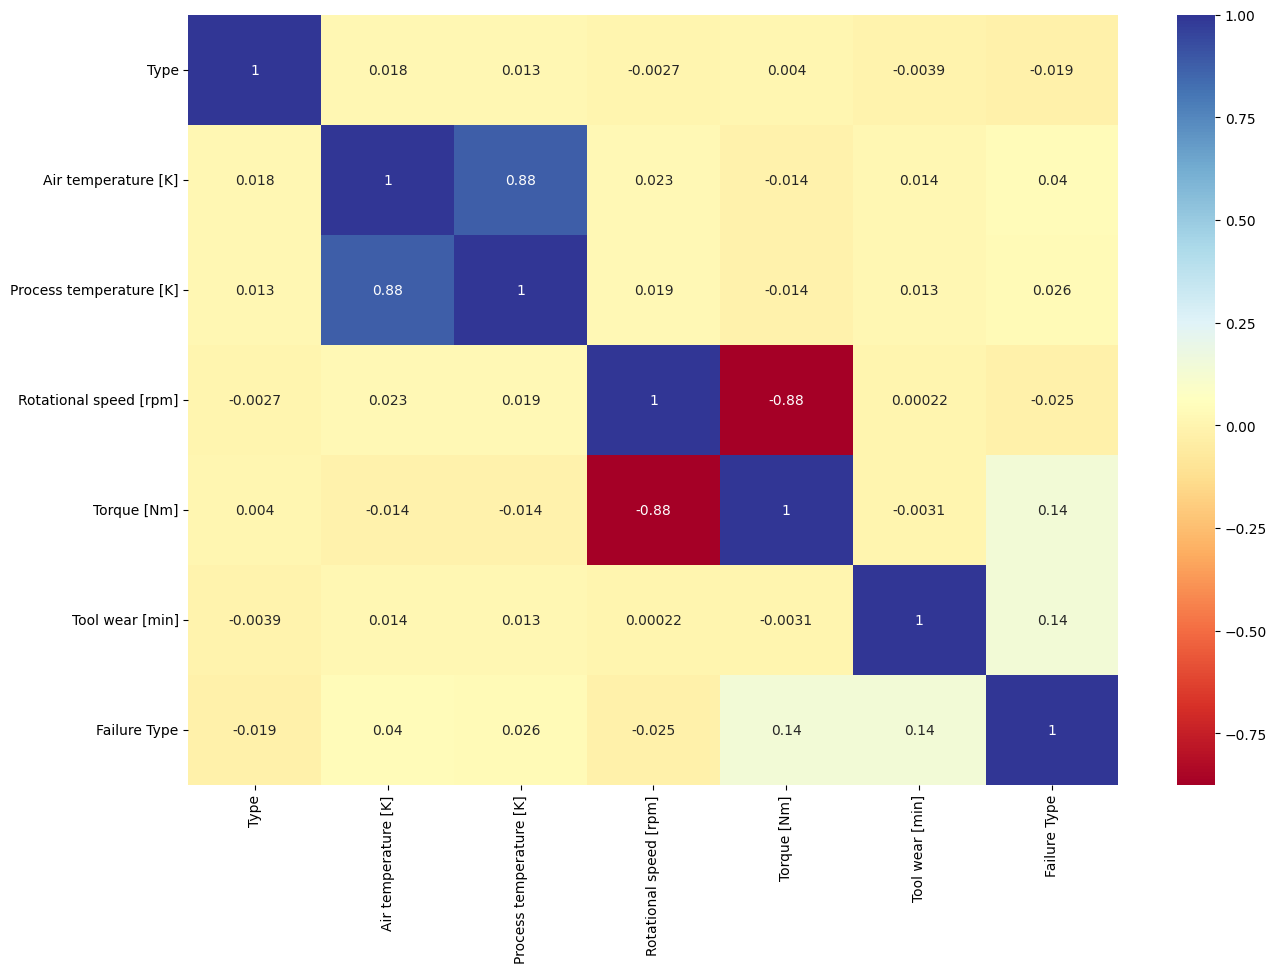

In [200]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

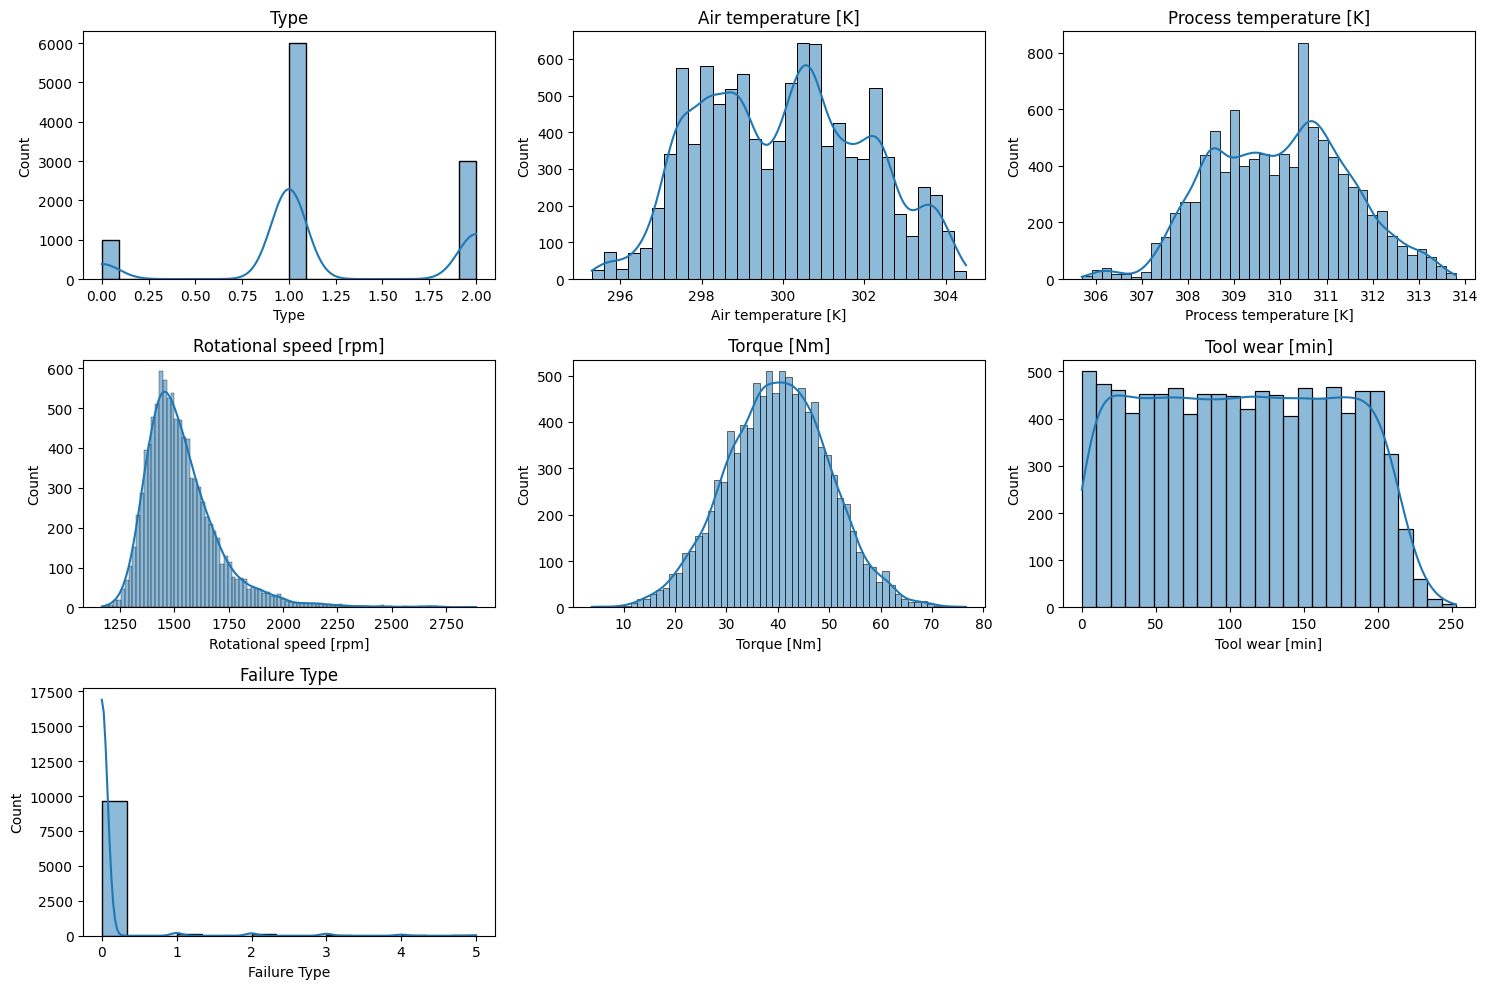

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>,
        <Axes: title={'center': 'Tool wear [min]'}>],
       [<Axes: title={'center': 'Failure Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

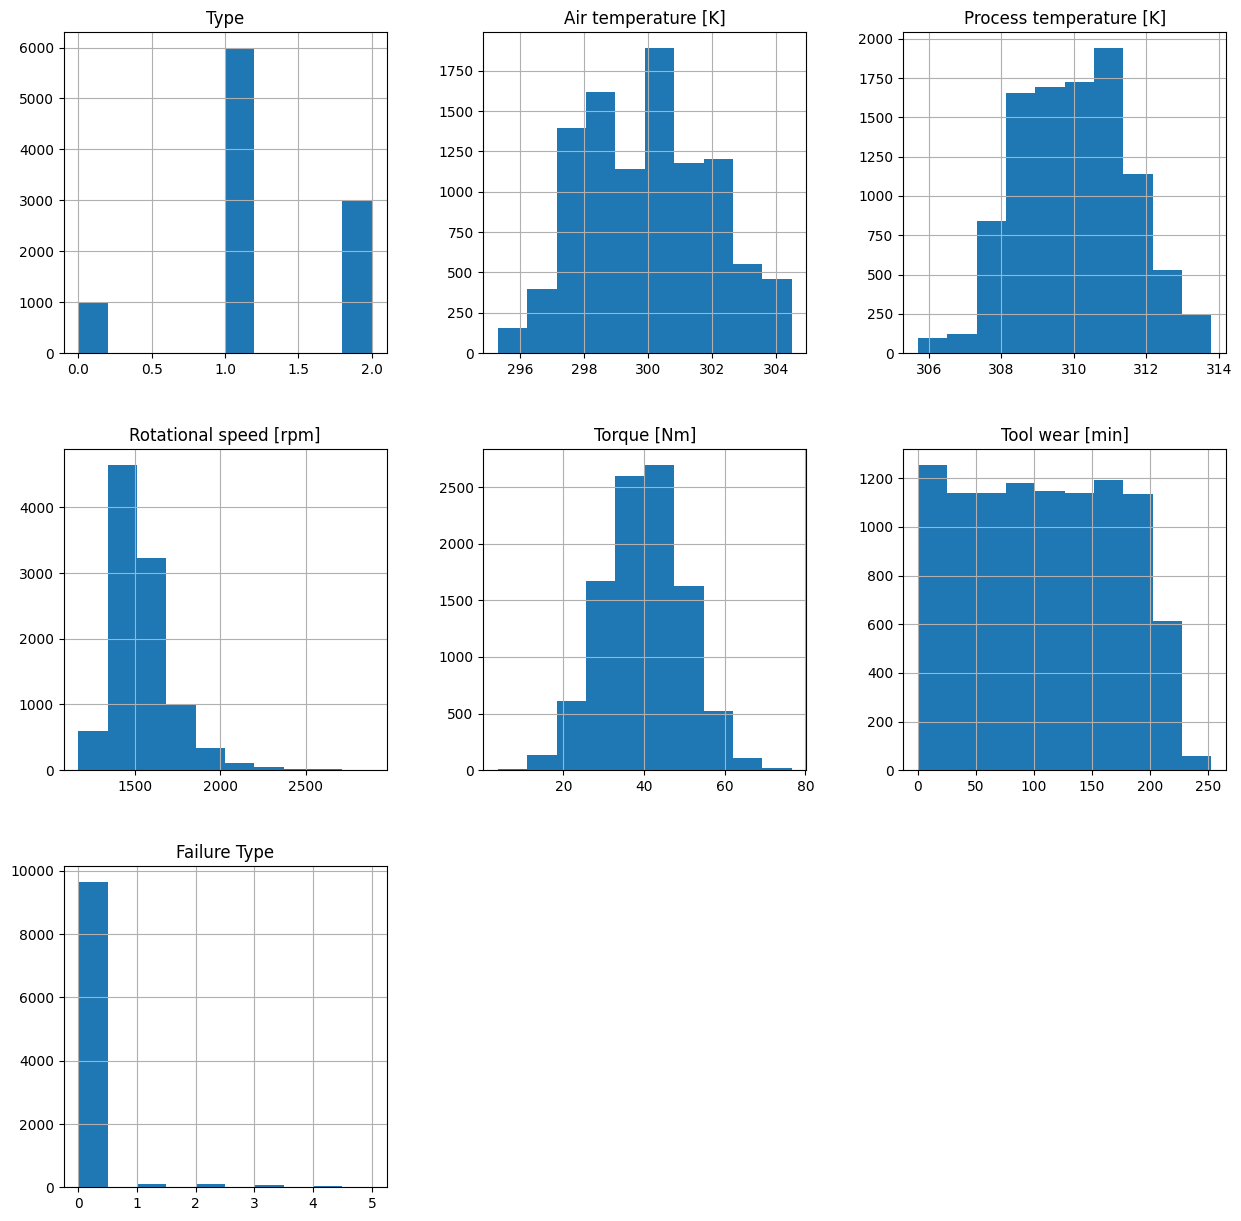

In [202]:
df.hist(figsize = (15 , 15))

In [203]:
df.describe()

Type  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean       1.19940           300.004930               310.005560   
std        0.60023             2.000259                 1.483734   
min        0.00000           295.300000               305.700000   
25%        1.00000           298.300000               308.800000   
50%        1.00000           300.100000               310.100000   
75%        2.00000           301.500000               311.100000   
max        2.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Failure Type  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.080600  
std                179.284096      9.968934        63.654147      0.479507  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      5.000000

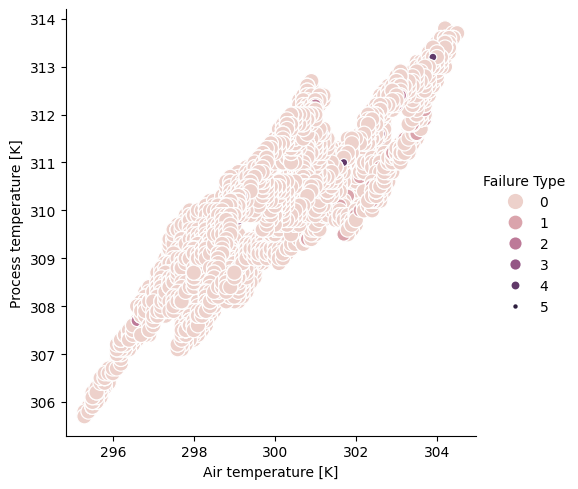

In [204]:
sns.relplot(x = "Air temperature [K]" ,
            y = "Process temperature [K]" ,
            hue="Failure Type" ,
            size="Failure Type" ,
            sizes=(120 , 10) ,
            data = df)

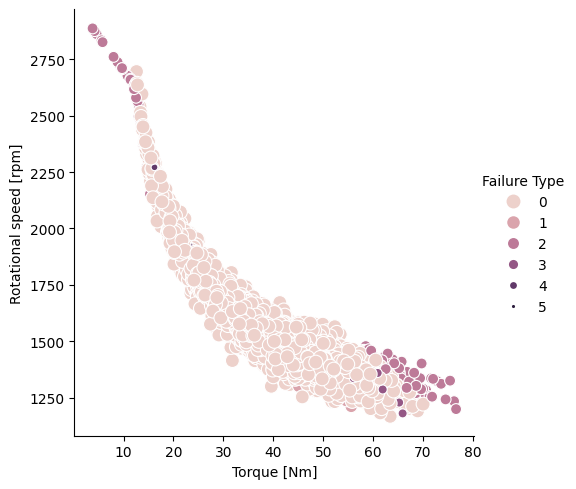

In [205]:
sns.relplot(x = "Torque [Nm]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (100 , 5) ,
            data = df)

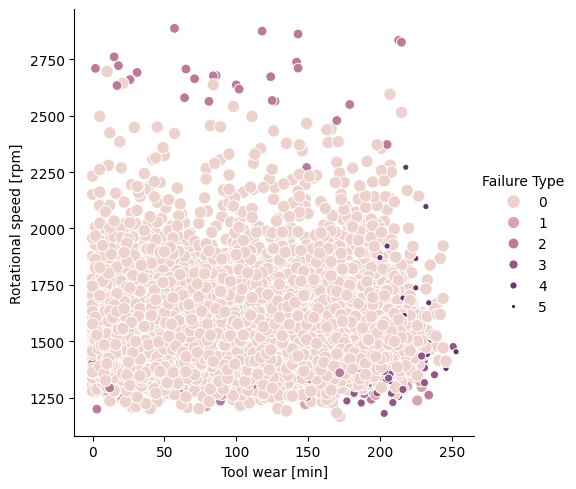

In [206]:
sns.relplot(x = "Tool wear [min]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (80, 5) ,
            data = df)

In [207]:
col_list = df.columns.to_list()

In [208]:
col_list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

In [209]:
X = df[col_list[:-1]]
y = df["Failure Type"]

In [210]:
X

Type  Air temperature [K]  Process temperature [K]  \
0        2                298.1                    308.6   
1        1                298.2                    308.7   
2        1                298.1                    308.5   
3        1                298.2                    308.6   
4        1                298.2                    308.7   
...    ...                  ...                      ...   
9995     2                298.8                    308.4   
9996     0                298.9                    308.4   
9997     2                299.0                    308.6   
9998     0                299.0                    308.7   
9999     2                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                       1551         42.8                0  
1                       1408         46.3                3  
2                       1498         49.4                5  
3                       1433         39.5                7  
4                       1408         40.0                9  
...                      ...          ...              ...  
9995                    1604         29.5               14  
9996                    1632         31.8               17  
9997                    1645         33.4               22  
9998                    1408         48.5               25  
9999                    1500         40.2               30  

[10000 rows x 6 columns]

In [211]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Failure Type, Length: 10000, dtype: int64

In [212]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5 , random_state = None)
for train_index , test_index in skf.split(X , y):
    x1_train , x1_test = X.iloc[train_index] , X.iloc[test_index]
    y1_train , y1_test = y.iloc[train_index] , y.iloc[test_index]
    train_0 , train_1 = len(y1_train[y1_train == 0]) , len(y1_train[y1_train == 1])
    test_0 , test_1 = len(y1_test[y1_test == 0]) , len(y1_test[y1_test == 1])
    print('train: 0=%d , 1=%d , Test: 0=%d , 1=%d' % (train_0 , train_1 , test_0 , test_1))

train: 0=7721 , 1=90 , Test: 0=1931 , 1=22
train: 0=7721 , 1=90 , Test: 0=1931 , 1=22
train: 0=7722 , 1=90 , Test: 0=1930 , 1=22
train: 0=7722 , 1=89 , Test: 0=1930 , 1=23
train: 0=7722 , 1=89 , Test: 0=1930 , 1=23


In [213]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 40 , test_size = 0.33 , stratify = y)

In [214]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state = 42)
X1_res , y1_res = smote.fit_resample(X_train , y_train)

In [215]:
X1_res

Type  Air temperature [K]  Process temperature [K]  \
0         1           297.500000               308.700000   
1         2           297.400000               308.600000   
2         2           296.400000               307.300000   
3         1           300.400000               309.300000   
4         1           297.400000               308.100000   
...     ...                  ...                      ...   
38743     1           302.567982               312.035964   
38744     1           302.766184               312.183092   
38745     1           299.733107               309.612309   
38746     1           302.463023               311.872267   
38747     1           299.051539               309.642826   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                        1371    46.500000              121  
1                        1452    41.200000              197  
2                        2077    19.100000               80  
3                        1413    50.300000              101  
4                        1348    57.400000               66  
...                       ...          ...              ...  
38743                    1437    42.908492              201  
38744                    1507    36.246384               79  
38745                    1567    35.541596              183  
38746                    1308    59.649157              168  
38747                    1364    51.360994              146  

[38748 rows x 6 columns]

In [216]:
X1_res.shape

(38748, 6)

In [217]:
y1_res

0        0
1        0
2        0
3        0
4        0
        ..
38743    5
38744    5
38745    5
38746    5
38747    5
Name: Failure Type, Length: 38748, dtype: int64

In [218]:
y1_res.shape

(38748,)

In [219]:
df_x = X1_res

In [220]:
df_x

Type  Air temperature [K]  Process temperature [K]  \
0         1           297.500000               308.700000   
1         2           297.400000               308.600000   
2         2           296.400000               307.300000   
3         1           300.400000               309.300000   
4         1           297.400000               308.100000   
...     ...                  ...                      ...   
38743     1           302.567982               312.035964   
38744     1           302.766184               312.183092   
38745     1           299.733107               309.612309   
38746     1           302.463023               311.872267   
38747     1           299.051539               309.642826   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                        1371    46.500000              121  
1                        1452    41.200000              197  
2                        2077    19.100000               80  
3                        1413    50.300000              101  
4                        1348    57.400000               66  
...                       ...          ...              ...  
38743                    1437    42.908492              201  
38744                    1507    36.246384               79  
38745                    1567    35.541596              183  
38746                    1308    59.649157              168  
38747                    1364    51.360994              146  

[38748 rows x 6 columns]

In [221]:
df_x["Type"].replace({0:"H",1:"L",2:"M"}, inplace=True)

In [222]:
df_x

Type  Air temperature [K]  Process temperature [K]  \
0        L           297.500000               308.700000   
1        M           297.400000               308.600000   
2        M           296.400000               307.300000   
3        L           300.400000               309.300000   
4        L           297.400000               308.100000   
...    ...                  ...                      ...   
38743    L           302.567982               312.035964   
38744    L           302.766184               312.183092   
38745    L           299.733107               309.612309   
38746    L           302.463023               311.872267   
38747    L           299.051539               309.642826   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                        1371    46.500000              121  
1                        1452    41.200000              197  
2                        2077    19.100000               80  
3                        1413    50.300000              101  
4                        1348    57.400000               66  
...                       ...          ...              ...  
38743                    1437    42.908492              201  
38744                    1507    36.246384               79  
38745                    1567    35.541596              183  
38746                    1308    59.649157              168  
38747                    1364    51.360994              146  

[38748 rows x 6 columns]

In [223]:
df_y = pd.DataFrame(y1_res)

In [224]:
df_y

Failure Type
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
38743             5
38744             5
38745             5
38746             5
38747             5

[38748 rows x 1 columns]

In [225]:
df_y["Failure Type"].replace({0:"No Failure",1:"Heat Dissipation Failure",2:"Power Failure",3:"Overstrain Failure",4:"Tool Wear Failure",5:"Random Failures"},inplace=True)

In [226]:
df_y

Failure Type
0           No Failure
1           No Failure
2           No Failure
3           No Failure
4           No Failure
...                ...
38743  Random Failures
38744  Random Failures
38745  Random Failures
38746  Random Failures
38747  Random Failures

[38748 rows x 1 columns]

In [227]:
df1 = pd.concat([df_x , df_y] , axis = 1)

In [228]:
df1

Type  Air temperature [K]  Process temperature [K]  \
0        L           297.500000               308.700000   
1        M           297.400000               308.600000   
2        M           296.400000               307.300000   
3        L           300.400000               309.300000   
4        L           297.400000               308.100000   
...    ...                  ...                      ...   
38743    L           302.567982               312.035964   
38744    L           302.766184               312.183092   
38745    L           299.733107               309.612309   
38746    L           302.463023               311.872267   
38747    L           299.051539               309.642826   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]     Failure Type  
0                        1371    46.500000              121       No Failure  
1                        1452    41.200000              197       No Failure  
2                        2077    19.100000               80       No Failure  
3                        1413    50.300000              101       No Failure  
4                        1348    57.400000               66       No Failure  
...                       ...          ...              ...              ...  
38743                    1437    42.908492              201  Random Failures  
38744                    1507    36.246384               79  Random Failures  
38745                    1567    35.541596              183  Random Failures  
38746                    1308    59.649157              168  Random Failures  
38747                    1364    51.360994              146  Random Failures  

[38748 rows x 7 columns]

In [229]:
df1["Failure Type"].value_counts()

Failure Type
Overstrain Failure          6467
Heat Dissipation Failure    6464
Power Failure               6462
Tool Wear Failure           6461
Random Failures             6454
No Failure                  6440
Name: count, dtype: int64

In [230]:
col_list = df.columns.to_list()

In [231]:
col_list

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Failure Type']

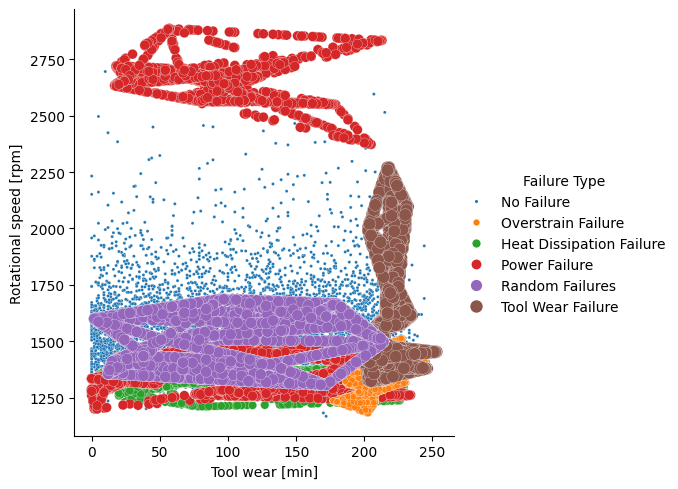

In [232]:
sns.relplot(x = "Tool wear [min]" ,
            y = "Rotational speed [rpm]" ,
            hue = "Failure Type" ,
            size = "Failure Type" ,
            sizes = (80 , 5) ,
            data = df1)

In [233]:
print(X_test.shape)
print(y_test.shape)

(3300, 6)
(3300,)


In [234]:
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse=False, handle_unknown="ignore"))


to_log = ["Rotational speed [rpm]" , "Tool wear [min]"]
to_scale = ["Air temperature [K]" ,"Process temperature [K]" , "Torque [Nm]"]

numeric_pipe_1 = make_pipeline(PowerTransformer())
numeric_pipe_2 = make_pipeline(StandardScaler())

full = ColumnTransformer(transformers = [("categorical", categorical_pipe, categorical_cols),
                                         ("power_transform", numeric_pipe_1, to_log),
                                         ("standardization", numeric_pipe_2, to_scale)])

In [235]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=6, random_state=40)

In [236]:
pipeline = Pipeline(
    steps=[("preprocess", full),("base",rfc)])

In [237]:
model_rfc = pipeline.fit(X1_res, y1_res)
y_pred_rfc = model_rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.38      0.57      0.45        37
           2       0.49      0.61      0.54        31
           3       0.69      0.77      0.73        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.52      0.46      3300
weighted avg       0.97      0.94      0.95      3300



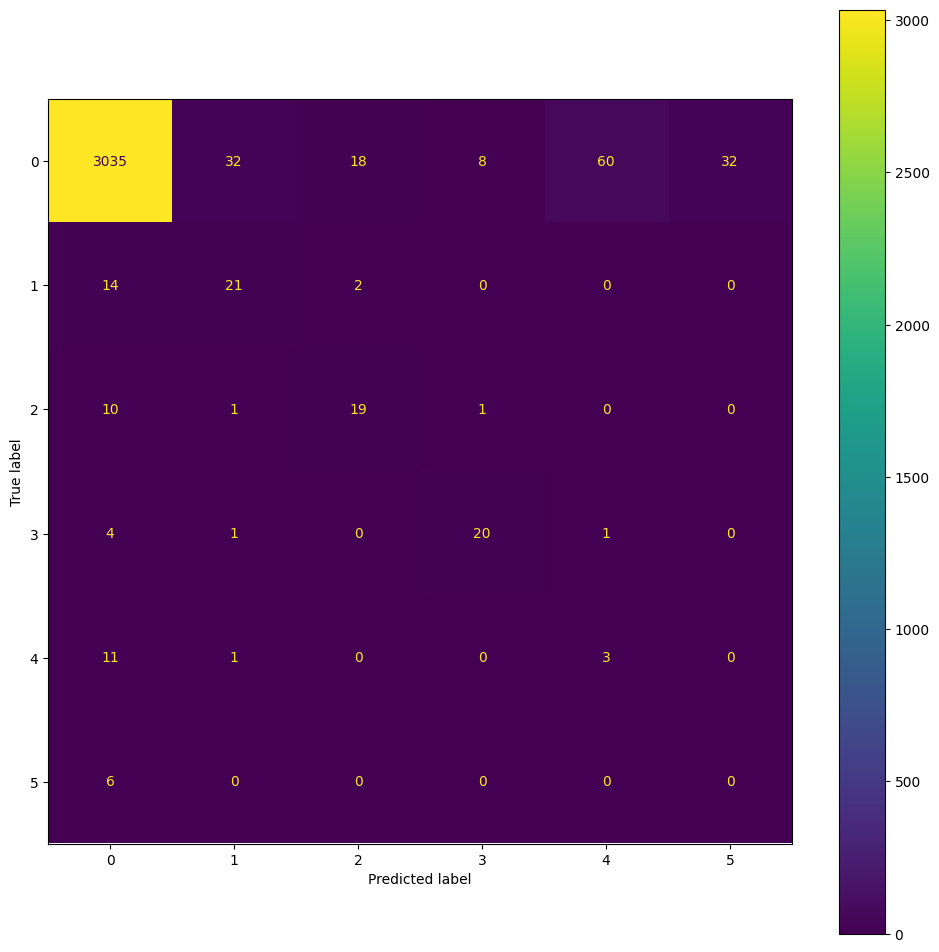

In [238]:
fig, ax = plt.subplots(figsize=(12 , 12))
print(classification_report(y_test, y_pred_rfc))

cm = confusion_matrix(y_test , y_pred_rfc)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
cmp.plot(ax=ax)
plt.show();

In [239]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.38      0.57      0.45        37
           2       0.49      0.61      0.54        31
           3       0.69      0.77      0.73        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.43      0.52      0.46      3300
weighted avg       0.97      0.94      0.95      3300



In [240]:
print("Accuracy : " , accuracy_score(y_test,y_pred_rfc) * 100 , "%")

Accuracy :  93.87878787878789 %


In [241]:
for actual, predicted in zip(y_test, y_pred_rfc):
    print("Acutal:" , actual , " , " , "Predicted:" , predicted)

Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 4
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 1  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 4
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
Acutal: 0  ,  Predicted: 0
A


BaggingClassifier

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3185
           1       0.36      0.51      0.42        37
           2       0.53      0.65      0.58        31
           3       0.63      0.65      0.64        26
           4       0.06      0.27      0.10        15
           5       0.01      0.17      0.02         6

    accuracy                           0.93      3300
   macro avg       0.43      0.53      0.46      3300
weighted avg       0.96      0.93      0.94      3300



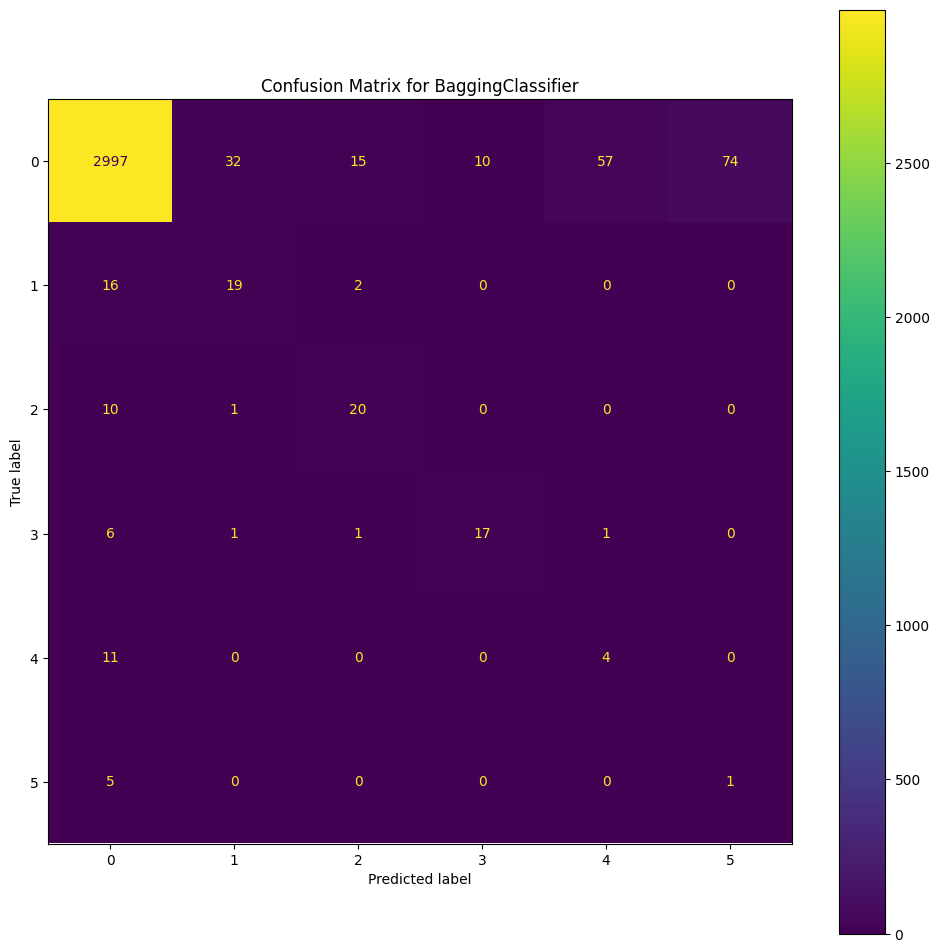

Accuracy for BaggingClassifier: 92.67%



In [242]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



pipeline_bagging = Pipeline([
    ("preprocess", full),
    ("base", BaggingClassifier())
])


model_name = "BaggingClassifier"
print(f"\n{model_name}\n")
model_fitted = pipeline_bagging.fit(X1_res, y1_res)
y_pred = model_fitted.predict(X_test)

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_bagging.classes_)
cmp.plot(ax=ax)
plt.title(f"Confusion Matrix for {model_name}")
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%\n")


ExtraTreesClassifier

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.37      0.57      0.45        37
           2       0.46      0.58      0.51        31
           3       0.65      0.77      0.70        26
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00         6

    accuracy                           0.94      3300
   macro avg       0.42      0.51      0.45      3300
weighted avg       0.96      0.94      0.95      3300



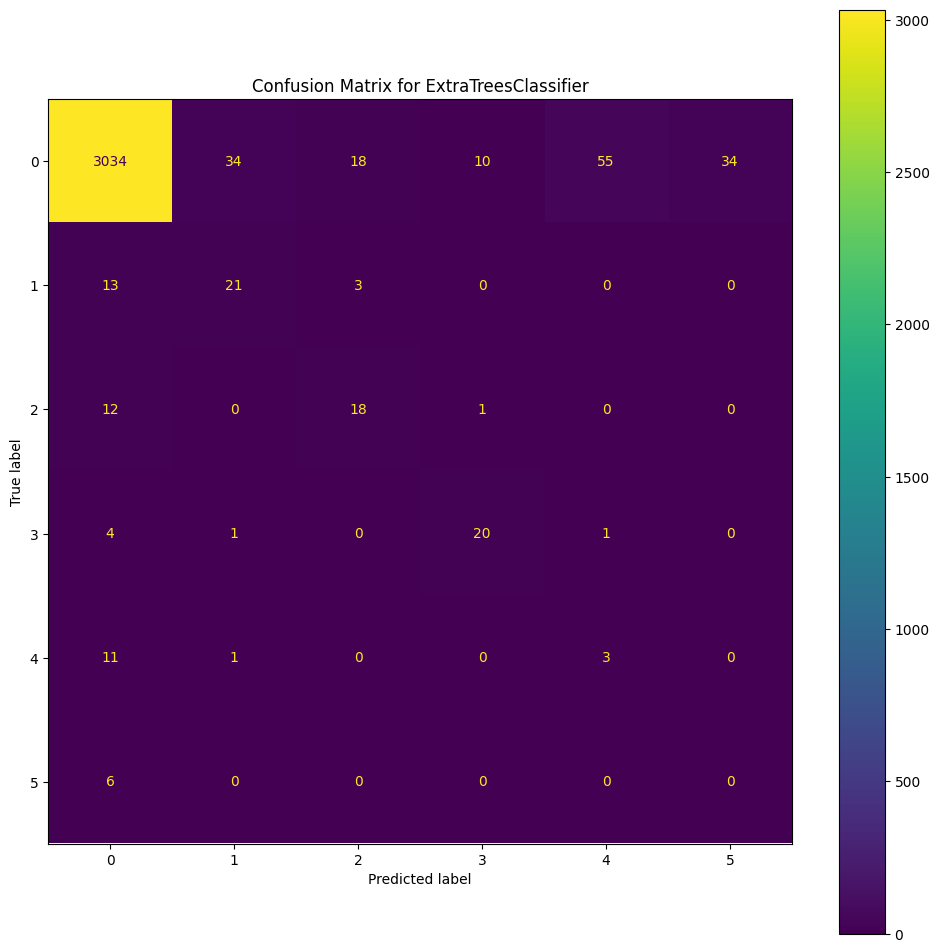

Accuracy for ExtraTreesClassifier: 93.82%



In [243]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

pipeline_extra_trees = Pipeline([
    ("preprocess", full),
    ("base", ExtraTreesClassifier())
])

model_name = "ExtraTreesClassifier"
print(f"\n{model_name}\n")
model_fitted = pipeline_extra_trees.fit(X1_res, y1_res)
y_pred = model_fitted.predict(X_test)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_extra_trees.classes_)
cmp.plot(ax=ax)
plt.title(f"Confusion Matrix for {model_name}")
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for {model_name}: {accuracy * 100:.2f}%\n")


In [244]:
pip install catboost

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3185
           1       0.82      0.97      0.89        37
           2       0.69      0.81      0.75        31
           3       0.68      0.81      0.74        26
           4       0.06      0.27      0.10        15
           5       0.01      0.17      0.03         6

    accuracy                           0.94      3300
   macro avg       0.54      0.66      0.58      3300
weighted avg       0.98      0.94      0.96      3300



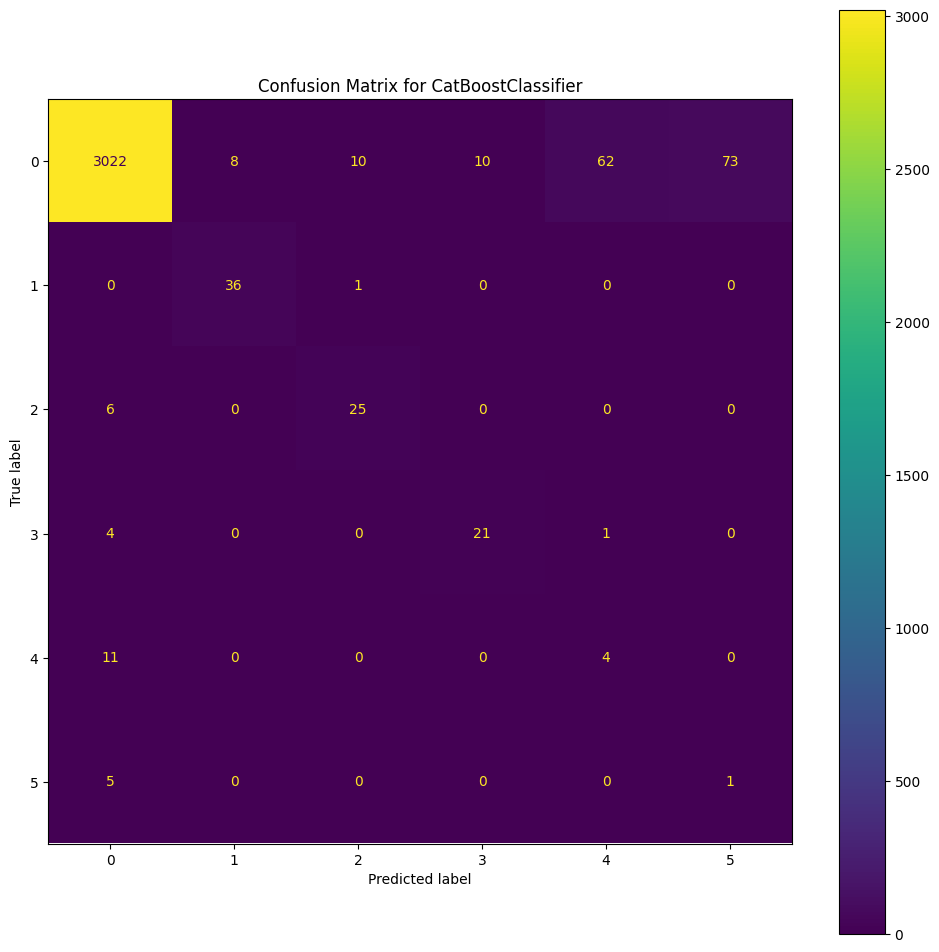

Accuracy for CatBoostClassifier: 94.21%


In [245]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

preprocessor = full.fit(X1_res, y1_res)
X1_res_processed = preprocessor.transform(X1_res)
X_test_processed = preprocessor.transform(X_test)


catboost_model = CatBoostClassifier(random_seed=42, logging_level='Silent')
catboost_model.fit(X1_res_processed, y1_res)


y_pred = catboost_model.predict(X_test_processed)


print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
cmp.plot(ax=ax)
plt.title(f"Confusion Matrix for CatBoostClassifier")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for CatBoostClassifier: {accuracy * 100:.2f}%")

In [246]:
import pickle

pickle.dump(catboost_model , open("Pred_Maintainance_final_.pkl","wb"))

In [247]:
input_data = pd.DataFrame({
    'Type' : [0.0],
    'Air temperature [K]' : [300.5],
    'Process temperature [K]' : [309.9],
    'Rotational speed [rpm]' : [1397.0],
    'Torque [Nm]' : [45.9],
    'Tool wear [min]' : [210.0]
})

model = pickle.load(open("Pred_Maintainance_final_.pkl","rb"))
prediction = model.predict(input_data)[0]
print(prediction)

[2]


In [248]:
model = pickle.load(open("Pred_Maintainance_final_.pkl","rb"))

for i in range(len(X_test)):
    actual = y_test.iloc[i]
    predicted = model.predict(X_test.iloc[[i]])[0]
    print(f"Actual: {actual}, Predicted: {predicted}, Features: {X_test.iloc[[i]].to_dict(orient='records')[0]}")

Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 300.8, 'Process temperature [K]': 311.2, 'Rotational speed [rpm]': 1429, 'Torque [Nm]': 52.3, 'Tool wear [min]': 77}
Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 300.8, 'Process temperature [K]': 311.9, 'Rotational speed [rpm]': 1356, 'Torque [Nm]': 44.3, 'Tool wear [min]': 214}
Actual: 0, Predicted: [0], Features: {'Type': 2, 'Air temperature [K]': 299.9, 'Process temperature [K]': 309.5, 'Rotational speed [rpm]': 2065, 'Torque [Nm]': 18.1, 'Tool wear [min]': 62}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air temperature [K]': 298.8, 'Process temperature [K]': 309.9, 'Rotational speed [rpm]': 1482, 'Torque [Nm]': 39.1, 'Tool wear [min]': 45}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air temperature [K]': 297.5, 'Process temperature [K]': 308.6, 'Rotational speed [rpm]': 1437, 'Torque [Nm]': 43.3, 'Tool wear [min]': 34}
Actual: 0, Predicted: [0], Features: {'Type': 1, 'Air 

In [249]:
pip install lime

In [250]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import lime
import lime.lime_tabular

In [251]:
X1_res["Type"].replace({"H" : 0 ,"L" : 1 , "M" : 2} , inplace = True)

In [252]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X1_res.values,
    feature_names=X_train.columns,
    class_names=catboost_model.classes_,
    mode='classification'
)


instance_idx = 1

explanation = explainer.explain_instance(
    X_test.iloc[[instance_idx]].values[0],
    catboost_model.predict_proba,
    num_features=len(input_data.columns)
)


print("Local Explanation:")
explanation.show_in_notebook(show_table=True)


explanation_list = explanation.as_list()
print("Local Explanation List:")
print(explanation_list)

max_impact_feature = max(explanation_list, key=lambda x: abs(x[1]))

print("The feature that impacted the prediction the most is " + max_impact_feature[0] + " i.e, this above specified the feature within this specific range had the most significant impact on the model's prediction for the given instance. ")

Local Explanation:


Local Explanation List:
[('Type > 1.00', 0.0), ('300.70 < Air temperature [K] <= 302.16', 0.0), ('Process temperature [K] > 311.11', 0.0), ('1351.00 < Rotational speed [rpm] <= 1405.00', 0.0), ('35.47 < Torque [Nm] <= 47.87', 0.0), ('Tool wear [min] > 206.00', 0.0)]
The feature that impacted the prediction the most is Type > 1.00 i.e, this above specified the feature within this specific range had the most significant impact on the model's prediction for the given instance. 


In [253]:
X1_res

Type  Air temperature [K]  Process temperature [K]  \
0         1           297.500000               308.700000   
1         2           297.400000               308.600000   
2         2           296.400000               307.300000   
3         1           300.400000               309.300000   
4         1           297.400000               308.100000   
...     ...                  ...                      ...   
38743     1           302.567982               312.035964   
38744     1           302.766184               312.183092   
38745     1           299.733107               309.612309   
38746     1           302.463023               311.872267   
38747     1           299.051539               309.642826   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
0                        1371    46.500000              121  
1                        1452    41.200000              197  
2                        2077    19.100000               80  
3                        1413    50.300000              101  
4                        1348    57.400000               66  
...                       ...          ...              ...  
38743                    1437    42.908492              201  
38744                    1507    36.246384               79  
38745                    1567    35.541596              183  
38746                    1308    59.649157              168  
38747                    1364    51.360994              146  

[38748 rows x 6 columns]

In [254]:
X1_res.to_csv("X1_res.csv")

In [255]:
X_test

Type  Air temperature [K]  Process temperature [K]  \
6954     2                300.8                    311.2   
7935     2                300.8                    311.9   
6366     2                299.9                    309.5   
1438     1                298.8                    309.9   
8784     1                297.5                    308.6   
...    ...                  ...                      ...   
7500     1                300.2                    311.8   
4781     1                303.7                    312.3   
2330     2                299.3                    308.7   
6134     1                301.0                    311.0   
6693     2                301.8                    311.0   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
6954                    1429         52.3               77  
7935                    1356         44.3              214  
6366                    2065         18.1               62  
1438                    1482         39.1               45  
8784                    1437         43.3               34  
...                      ...          ...              ...  
7500                    1410         51.4              189  
4781                    1384         45.9              121  
2330                    1390         49.3              215  
6134                    1581         37.0              127  
6693                    1756         26.7               33  

[3300 rows x 6 columns]

In [256]:
pip install dice-ml

In [257]:
data['Air temperature [K]'] = data['Air temperature [K]'].astype(float)

In [258]:
data['Air temperature [K]'].dtype

dtype('float64')

In [274]:
import dice_ml
from dice_ml.utils import helpers


columns = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]" , "Failure Type"]
data = pd.DataFrame(columns=columns)

instance_idx = int(input())

# test_df = pd.DataFrame({
#         'Type' : [0.0],
#         'Air temperature [K]' : [300.5],
#         'Process temperature [K]' : [309.9],
#         'Rotational speed [rpm]' : [1397.0],
#         'Torque [Nm]' : [45.9],
#         'Tool wear [min]' : [210.0]
#         })

# Try this, because this outputs 2 ("Power Failure")

test_df = X_test.iloc[[instance_idx]]


d = dice_ml.Data(dataframe = df, continuous_features = ['Type' , 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], outcome_name='Failure Type')
m = dice_ml.Model(model = catboost_model, backend = "sklearn")

exp = dice_ml.Dice(d , m)

cf = exp.generate_counterfactuals(test_df, total_CFs = 2, desired_class = 0, features_to_vary=['Type' , 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

cf.visualize_as_dataframe()

0


100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

Query instance (original outcome : 0)


Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2           300.799988               311.200012                    1429   

   Torque [Nm]  Tool wear [min]  Failure Type  
0    52.299999               77             0


Diverse Counterfactual set (new outcome: 0)


Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    311.2                    1429   
1     2                300.8                    311.2                    2601   

   Torque [Nm]  Tool wear [min]  Failure Type  
0         52.3               62             0  
1         52.3              118             0

In [281]:
import dice_ml

# Assuming you have defined X_test and df appropriately

columns = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Failure Type"]
data = pd.DataFrame(columns=columns)

instance_idx = int(input())

test_df = X_test.iloc[[instance_idx]]

d = dice_ml.Data(dataframe=df, continuous_features=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'], outcome_name='Failure Type')
m = dice_ml.Model(model=catboost_model, backend="sklearn")

exp = dice_ml.Dice(d, m)

cf = exp.generate_counterfactuals(test_df, total_CFs=2, desired_class=0, features_to_vary=['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

counterfactual_df = cf.cf_examples_list[0].final_cfs_df

counterfactual_df = counterfactual_df.reset_index(drop=True)

print(counterfactual_df)

0


100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    311.2                    1429   
1     2                300.8                    313.6                    1261   

   Torque [Nm]  Tool wear [min]  Failure Type  
0         60.0               77             0  
1         52.3               77             0  


In [282]:
print(counterfactual_df)

   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                300.8                    311.2                    1429   
1     2                300.8                    313.6                    1261   

   Torque [Nm]  Tool wear [min]  Failure Type  
0         60.0               77             0  
1         52.3               77             0  


In [260]:
df.to_csv("df.csv")

In [296]:
pip show dice_ml

Name: dice-ml
Version: 0.11
Summary: Generate Diverse Counterfactual Explanations for any machine learning model.
Home-page: https://github.com/interpretml/DiCE
Author: Ramaravind Mothilal, Amit Sharma, Chenhao Tan
Author-email: raam.arvind93@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: jsonschema, numpy, pandas, raiutils, scikit-learn, tqdm
Required-by: 


In [302]:
pip show catboost

Name: catboost
Version: 1.2.5
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 


In [303]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


In [304]:
pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, python-dateutil, pytz
Required-by: altair, arviz, bigframes, bokeh, bqplot, catboost, cmdstanpy, cudf-cu12, cufflinks, datascience, db-dtypes, dice-ml, dopamine_rl, fastai, geemap, geopandas, google-colab, gspread-dataframe, holoviews, ibis-framework, mizani, mlxtend, pandas-datareader, pandas-gbq, panel, plotnine, prophet, pymc, raiutils, seaborn, sklearn-pandas, statsmodels, vega-datasets, xarray, yfinance


In [305]:
pip show dice-ml

Name: dice-ml
Version: 0.11
Summary: Generate Diverse Counterfactual Explanations for any machine learning model.
Home-page: https://github.com/interpretml/DiCE
Author: Ramaravind Mothilal, Amit Sharma, Chenhao Tan
Author-email: raam.arvind93@gmail.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: jsonschema, numpy, pandas, raiutils, scikit-learn, tqdm
Required-by: 
